<a href="https://colab.research.google.com/github/harishjungshahi/Deep-Learning/blob/main/CIFAR10_Classification__Data_Agumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Harish Practise : CIFAR10 Classification Data Agumentation

In [3]:
# Importing Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import numpy as np

In [4]:
# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

## Data Load

In [5]:
# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ])

# CIFAR -10 DATASET
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100%|██████████| 170M/170M [00:10<00:00, 16.1MB/s]


In [6]:
len(train_dataset), len(test_dataset)

(50000, 10000)

In [7]:
batch_size = 100

#Data Loader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

# Visualize a Few Images

In [8]:
for i, (images,labels) in enumerate(train_loader):
  print(images.shape)
  print(labels.shape)
  break

torch.Size([100, 3, 32, 32])
torch.Size([100])


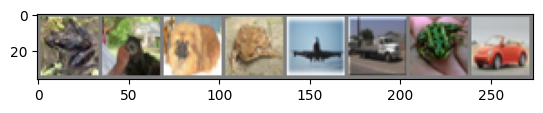

In [9]:
def imshow(img):
  img = img/2 + 0.5 #unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

#show images
imshow(torchvision.utils.make_grid(images[:8]))

In [10]:
labels[:8]

tensor([6, 3, 5, 6, 0, 9, 6, 1])

In [11]:
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [12]:
[classes[i] for i in labels[:8]]

['frog', 'cat', 'dog', 'frog', 'plane', 'truck', 'frog', 'car']

## Train a Neural Network

In [13]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=(3,3), padding='same'),  # Output: (32, 32, 32)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),        # Output: (32, 16, 16)

            nn.Conv2d(32, 64, kernel_size=(3,3)),             # Output: (64, 14, 14)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))         # Output: (64, 7, 7)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),                                # Flatten to (64 * 7 * 7 = 3136)
            nn.Linear(64 * 7 * 7, 600),                  # Corrected input size
            nn.ReLU(),
            nn.Linear(600, 120),
            nn.ReLU(),
            nn.Linear(120, 10)
        )

    def forward(self, x):
        x = self.network(x)
        x = self.fc_layers(x)
        return x

In [14]:
model = CNN()
dummy_input = torch.randn(1, 3, 32, 32)  # Single example with CIFAR-10 dimensions
output = model(dummy_input)
print("Output shape:", output.shape)  # Should be [1, 10]

Output shape: torch.Size([1, 10])


In [15]:
# Hyperparameters
num_epochs = 10
learning_rate = 0.001

model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [16]:
# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

# Testing the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%")

Epoch [1/10], Step [100/500], Loss: 1.4406
Epoch [1/10], Step [200/500], Loss: 1.2581
Epoch [1/10], Step [300/500], Loss: 1.3827
Epoch [1/10], Step [400/500], Loss: 1.1878
Epoch [1/10], Step [500/500], Loss: 1.0363
Epoch [2/10], Step [100/500], Loss: 0.9082
Epoch [2/10], Step [200/500], Loss: 0.9833
Epoch [2/10], Step [300/500], Loss: 0.9071
Epoch [2/10], Step [400/500], Loss: 1.0210
Epoch [2/10], Step [500/500], Loss: 0.8238
Epoch [3/10], Step [100/500], Loss: 0.7263
Epoch [3/10], Step [200/500], Loss: 0.6289
Epoch [3/10], Step [300/500], Loss: 0.8519
Epoch [3/10], Step [400/500], Loss: 0.6783
Epoch [3/10], Step [500/500], Loss: 0.7644
Epoch [4/10], Step [100/500], Loss: 0.7153
Epoch [4/10], Step [200/500], Loss: 0.7263
Epoch [4/10], Step [300/500], Loss: 0.5883
Epoch [4/10], Step [400/500], Loss: 0.6515
Epoch [4/10], Step [500/500], Loss: 0.5681
Epoch [5/10], Step [100/500], Loss: 0.6090
Epoch [5/10], Step [200/500], Loss: 0.4600
Epoch [5/10], Step [300/500], Loss: 0.3088
Epoch [5/10

In [23]:
# Training function
def train_model(model, criterion, optimizer, train_loader, val_loader, epochs=5):
    train_losses, val_losses, val_accuracy = [], [], []
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss / len(train_loader))

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_losses.append(val_loss / len(val_loader))
        val_accuracy.append(correct/total)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy:  {100 * val_accuracy[-1]:.2f}%")

    return train_losses, val_losses, val_accuracy

In [25]:
# Hyperparameters
num_epochs = 5
learning_rate = 0.001

model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train without augmentation
train_losses, val_losses, val_accuracy = train_model(model, criterion, optimizer, train_loader, test_loader, epochs=5)

Epoch 1/5, Train Loss: 1.4021, Val Loss: 1.1139, Val Accuracy:  60.63%
Epoch 2/5, Train Loss: 0.9770, Val Loss: 0.9407, Val Accuracy:  66.80%
Epoch 3/5, Train Loss: 0.7816, Val Loss: 0.8452, Val Accuracy:  70.88%
Epoch 4/5, Train Loss: 0.6198, Val Loss: 0.8257, Val Accuracy:  71.72%
Epoch 5/5, Train Loss: 0.4735, Val Loss: 0.8207, Val Accuracy:  73.00%


## Data Agumentation

In [30]:
# import torchvision.transforms as transforms

transform_with_aug = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_dataset_aug = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_with_aug)
train_loader_aug = DataLoader(train_dataset_aug, batch_size=32, shuffle=True)

model_aug = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_aug.parameters(), lr=learning_rate)

train_losses, val_losses, val_accuracy = train_model(model_aug, criterion, optimizer, train_loader_aug, test_loader, epochs=5)

Epoch 1/5, Train Loss: 1.3793, Val Loss: 1.0729, Val Accuracy:  62.02%
Epoch 2/5, Train Loss: 1.0348, Val Loss: 0.9177, Val Accuracy:  67.62%
Epoch 3/5, Train Loss: 0.8980, Val Loss: 0.8418, Val Accuracy:  70.72%
Epoch 4/5, Train Loss: 0.8130, Val Loss: 0.7991, Val Accuracy:  73.11%
Epoch 5/5, Train Loss: 0.7507, Val Loss: 0.7364, Val Accuracy:  74.54%
